In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
chess = pd.read_csv("chessTrimmed.csv")

In [3]:
chess.head()

,Unnamed: 0,turns,victory_statusR,winnerR,black_rating,white_rating
0,0,-1.413916,1,1,1191,1500
1,1,-1.324552,2,2,1261,1322
2,2,0.015907,3,1,1500,1496
3,3,0.015907,3,1,1454,1439
4,4,1.028698,3,1,1469,1523


In [5]:
chess1 = chess[['turns', 'victory_statusR', 'black_rating', 'white_rating', 'winnerR']]

In [6]:
scaler = StandardScaler()
scaler.fit(chess1.drop('winnerR', axis=1))
scaledVariables = scaler.transform(chess1.drop('winnerR',axis=1))
chessScaled = pd.DataFrame(scaledVariables, columns=chess1.columns[:-1])

In [7]:
chessScaled.head()

,turns,victory_statusR,black_rating,white_rating
0,-1.413952,-1.915744,-1.366985,-0.331788
1,-1.324585,-0.466527,-1.126459,-0.942955
2,0.015907,0.982690,-0.305234,-0.345522
3,0.015907,0.982690,-0.463294,-0.541233
4,1.028724,0.982690,-0.411753,-0.252817


In [8]:
x = chessScaled
y = chess1['winnerR']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [10]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [11]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[1912 1114    5]
 [1091 1609    6]
 [   7    3  271]]
              precision    recall  f1-score   support

           1       0.64      0.63      0.63      3031
           2       0.59      0.59      0.59      2706
           3       0.96      0.96      0.96       281

    accuracy                           0.63      6018
   macro avg       0.73      0.73      0.73      6018
weighted avg       0.63      0.63      0.63      6018



## Looks like this model isn't the best at precision at 63% weighted average. It's great at predicting a draw (96%), but not at predicting a white win (64%), or a black win (59%). 

## Seeing if adding neighbors will increase accuracy

In [12]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predI = knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

Text(0, 0.5, 'Error Rate')

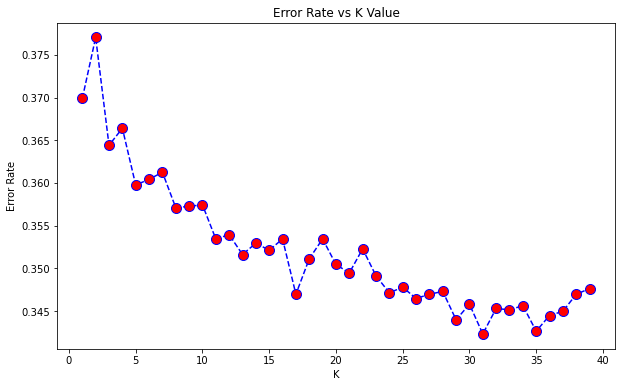

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Looks like the lowest error rate is at 31 and 35 neighbors. Creating a model with 31. 

In [15]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [16]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[2088  943    0]
 [1106 1600    0]
 [   5    6  270]]
              precision    recall  f1-score   support

           1       0.65      0.69      0.67      3031
           2       0.63      0.59      0.61      2706
           3       1.00      0.96      0.98       281

    accuracy                           0.66      6018
   macro avg       0.76      0.75      0.75      6018
weighted avg       0.66      0.66      0.66      6018



## Increased the accuracy somewhat. But this still isn't a great model. 